<a href="https://colab.research.google.com/github/Anas321/Active_Learning_GB/blob/main/HolyGrail_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and Import Libraries

In [ ]:
# !pip3 install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl
# !pip3 install torchvision
!pip3 install pyro-ppl
!pip3 install gpflow
!pip3 install hypertunity

In [ ]:
# !pip3 install snorkel

In [ ]:
# !pip3 install modAL

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import hypertunity as ht

# from sklearn.svm import SVC, LinearSVC

# import torch
# import pyro
# import pyro.distributions as dist
# from torch.distributions.constraints import positive

import sklearn.gaussian_process as gp
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

# from modAL.models import ActiveLearner


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA

import gpflow
from gpflow.utilities import print_summary


In [ ]:
np.random.seed(1)

Go to the right directory

In [ ]:
!pwd
!ls

/content/drive/My Drive/Colab Notebooks/HolyGrail_test
'Test task July 2020 - Sheet1.csv'


In [ ]:
cd drive/My\ Drive/Colab\ Notebooks/HolyGrail_test/

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/HolyGrail_test/'
/content/drive/My Drive/Colab Notebooks/HolyGrail_test


In [ ]:
pwd

'/content/drive/My Drive/Colab Notebooks/HolyGrail_test'

In [ ]:
ls

'Test task July 2020 - Sheet1.csv'


In [ ]:
# # upload data file
# files.upload()

In [ ]:
ls

'Test task July 2020 - Sheet1.csv'


Import Data

In [ ]:
data = pd.read_csv('Test task July 2020 - Sheet1.csv')

Data Initial Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Input1   600 non-null    object 
 1   Input2   600 non-null    object 
 2   Input3   600 non-null    object 
 3   Input4   600 non-null    float64
 4   Input5   600 non-null    float64
 5   Input6   600 non-null    float64
 6   Input7   600 non-null    float64
 7   Input8   600 non-null    float64
 8   Input9   600 non-null    float64
 9   Input10  600 non-null    float64
 10  Input11  600 non-null    float64
 11  Input12  600 non-null    float64
 12  Input13  600 non-null    float64
 13  Input14  600 non-null    float64
 14  Input15  600 non-null    float64
 15  Input16  600 non-null    int64  
 16  Target   600 non-null    float64
dtypes: float64(13), int64(1), object(3)
memory usage: 79.8+ KB


In [ ]:
data.describe(include='all')

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Input14,Input15,Input16,Target
count,600,600,600,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
unique,7,8,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ACN,PUR,LiClO4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,101,91,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,10753.079667,1008.978500,450.380000,42.231333,522.289833,1581.572833,642.098833,49.957167,1172.423167,116.638167,0.509833,270.268519,0.483333,1179.171172
std,NaN,NaN,NaN,5693.583199,565.175402,254.635034,10.157400,290.950452,838.421529,205.396181,5.628414,700.645508,49.024551,0.297322,108.551663,0.500139,1427.136553
min,NaN,NaN,NaN,1009.300000,52.400000,1.200000,25.000000,13.000000,100.600000,301.300000,40.000000,13.300000,30.200000,0.000000,100.000000,0.000000,4.851770
25%,NaN,NaN,NaN,5826.425000,508.300000,224.850000,33.475000,265.625000,847.775000,454.750000,45.375000,542.550000,74.275000,0.200000,177.777800,0.000000,184.083723
50%,NaN,NaN,NaN,10726.050000,989.800000,457.200000,41.800000,542.400000,1641.100000,639.500000,50.100000,1158.900000,116.050000,0.500000,255.555600,0.000000,619.636993
75%,NaN,NaN,NaN,15758.050000,1489.450000,663.425000,50.900000,769.800000,2273.250000,819.200000,54.600000,1771.000000,159.800000,0.800000,372.222200,1.000000,1790.231535


In [ ]:
data.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Input14,Input15,Input16,Target
0,acetone,PDMS,LiClO4,12825.6,75.7,546.3,50.6,78.8,1408.9,463.1,43.6,120.3,97.8,0.8,450.0000,0,246.086636
1,ACN,PUR,LiI,5161.7,1365.1,397.2,39.7,152.4,423.3,751.8,56.1,944.7,90.4,0.8,138.8889,1,779.498146
2,DMSO,PS,LiClO6,13297.0,221.2,528.9,37.1,209.4,2737.2,829.7,58.1,2304.2,103.1,0.9,177.7778,0,5145.489427
3,propanol,PP,LiClO4,18131.2,1550.2,875.9,34.8,976.5,316.6,519.5,46.0,158.6,180.1,0.4,100.0000,1,6.773916
4,ACN,PMMA,LiClO6,19764.5,201.7,371.8,40.5,614.0,2499.8,989.7,53.9,815.9,116.1,0.9,100.0000,0,601.290165


In [ ]:
data.tail()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Input14,Input15,Input16,Target
595,acetone,Nylon,LiClO4,9235.5,413.8,759.3,42.5,518.9,2316.1,949.4,55.5,297.5,99.8,0.5,450.0000,0,147.716638
596,THF,PUR,LiBF4,4959.3,272.3,558.7,55.2,331.9,2945.9,825.4,46.2,1913.9,37.7,0.6,255.5556,0,331.005190
597,acetone,Nylon,LiClO6,1120.6,1997.9,842.0,52.6,348.1,2480.4,734.1,51.8,1480.2,185.0,1.0,100.0000,1,3293.799219
598,ACN,PDMS,LiClO6,17819.0,53.6,339.4,42.1,610.6,822.6,504.9,54.8,1150.0,136.6,0.1,100.0000,0,248.158268
599,propanol,PDMS,LiCF3SO3,7843.8,259.0,833.8,43.8,851.9,2956.3,611.0,48.8,2149.6,67.6,0.9,294.4444,1,539.745842


In [ ]:
data_copy = data.copy()

In [ ]:
scaler = StandardScaler()

In [ ]:
# scale the data
for i in range(data_copy.shape[1]):
  if type(data_copy[data_copy.columns[i]].values[0]) != str:
    data_copy[data_copy.columns[i]] = scaler.fit_transform(
        data_copy[data_copy.columns[i]].values.reshape(-1,1))

In [ ]:
data_copy

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Input14,Input15,Input16,Target
0,acetone,PDMS,LiClO4,0.364314,-1.652686,0.377010,0.824586,-1.525551,-0.206122,-0.872208,-1.130420,-1.502901,-0.384580,0.976747,1.657104,-0.967204,-0.654361
1,ACN,PUR,LiI,-0.982869,0.630634,-0.209022,-0.249419,-1.272376,-1.382645,0.534541,1.092307,-0.325290,-0.535651,0.976747,-1.211306,1.033908,-0.280286
2,DMSO,PS,LiClO6,0.447178,-1.395029,0.308620,-0.505603,-1.076303,1.379487,0.914125,1.447944,1.616682,-0.276381,1.313363,-0.852754,-0.967204,2.781533
3,propanol,PP,LiClO4,1.296947,0.958416,1.672492,-0.732228,1.562428,-1.510014,-0.597388,-0.703656,-1.448192,1.295571,-0.369716,-1.569857,1.033908,-0.822189
4,ACN,PMMA,LiClO6,1.584053,-1.429560,-0.308856,-0.170593,0.315472,1.096099,1.693757,0.701107,-0.509274,-0.010987,1.313363,-1.569857,-0.967204,-0.405261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,acetone,Nylon,LiClO4,-0.266765,-1.053965,1.214200,0.026472,-0.011661,0.876814,1.497387,0.985617,-1.249781,-0.343751,-0.033101,1.657104,-0.967204,-0.723347
596,THF,PUR,LiBF4,-1.018447,-1.304539,0.425748,1.277836,-0.654918,1.628615,0.893172,-0.668093,1.059160,-1.611520,0.303515,-0.135651,-0.967204,-0.594809
597,acetone,Nylon,LiClO6,-1.693225,1.751220,1.539249,1.021651,-0.599192,1.072941,0.448294,0.327689,0.439643,1.395604,1.649978,-1.569857,1.033908,1.482964
598,ACN,PDMS,LiClO6,1.242068,-1.691821,-0.436203,-0.012941,0.303776,-0.905995,-0.668529,0.861144,-0.032030,0.407520,-1.379564,-1.569857,-0.967204,-0.652909


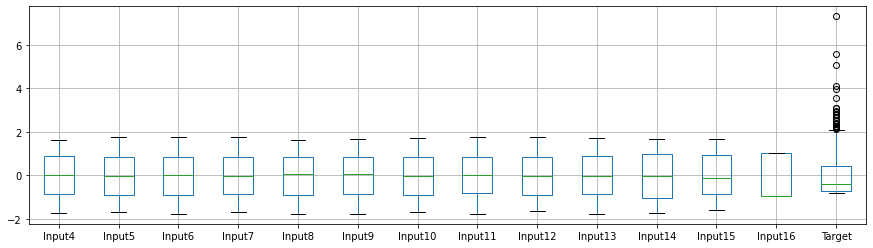

In [ ]:
data_copy.boxplot(figsize=(15,4))

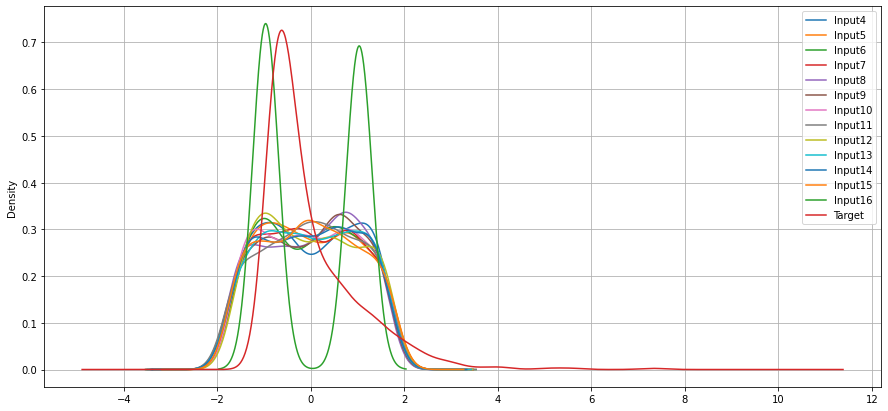

In [ ]:
data_copy.plot.density(figsize=(15,7), grid=True)

In [ ]:
# Are there any null values? 
data_copy.isnull().sum()

Input1     0
Input2     0
Input3     0
Input4     0
Input5     0
Input6     0
Input7     0
Input8     0
Input9     0
Input10    0
Input11    0
Input12    0
Input13    0
Input14    0
Input15    0
Input16    0
Target     0
dtype: int64

In [ ]:
# Are there any duplicated values?
data_copy.duplicated().sum()

0

Preprocessing

In [ ]:
df_pre = data.copy()

catFeat = pd.DataFrame(data=data[data.columns[0:3]])
numFeat = pd.DataFrame(data=data[data.columns[3:-1]])
target = pd.DataFrame(data=data[data.columns[-1]])

catFeat_enc = pd.get_dummies(data=catFeat)
df_pre = df_pre.drop(labels=catFeat.columns, axis=1)
df_pre = pd.concat([catFeat_enc, df_pre], axis=1)
df_pre

,Input1_ACN,Input1_DMF,Input1_DMSO,Input1_THF,Input1_acetone,Input1_chloroform,Input1_propanol,Input2_Nylon,Input2_PDMS,Input2_PEO,Input2_PMMA,Input2_PP,Input2_PS,Input2_PUR,Input2_PVC,Input3_LiBF4,Input3_LiCF3SO3,Input3_LiClO4,Input3_LiClO6,Input3_LiI,Input3_LiTFSI,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Input14,Input15,Input16,Target
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,12825.6,75.7,546.3,50.6,78.8,1408.9,463.1,43.6,120.3,97.8,0.8,450.0000,0,246.086636
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,5161.7,1365.1,397.2,39.7,152.4,423.3,751.8,56.1,944.7,90.4,0.8,138.8889,1,779.498146
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,13297.0,221.2,528.9,37.1,209.4,2737.2,829.7,58.1,2304.2,103.1,0.9,177.7778,0,5145.489427
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,18131.2,1550.2,875.9,34.8,976.5,316.6,519.5,46.0,158.6,180.1,0.4,100.0000,1,6.773916
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,19764.5,201.7,371.8,40.5,614.0,2499.8,989.7,53.9,815.9,116.1,0.9,100.0000,0,601.290165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,9235.5,413.8,759.3,42.5,518.9,2316.1,949.4,55.5,297.5,99.8,0.5,450.0000,0,147.716638
596,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,4959.3,272.3,558.7,55.2,331.9,2945.9,825.4,46.2,1913.9,37.7,0.6,255.5556,0,331.005190
597,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1120.6,1997.9,842.0,52.6,348.1,2480.4,734.1,51.8,1480.2,185.0,1.0,100.0000,1,3293.799219
598,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,17819.0,53.6,339.4,42.1,610.6,822.6,504.9,54.8,1150.0,136.6,0.1,100.0000,0,248.158268


In [ ]:
X = df_pre[df_pre.columns[:-1]]
y = df_pre[df_pre.columns[-1]]
print(df_pre.shape)
print(X.shape)
print(y.shape)

(600, 35)
(600, 34)
(600,)


In [ ]:
# def splitData(X, y, test_size=0.3):
test_size=0.3
X_pool, X_test, y_pool, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

X_pool_cat = X_pool[X_pool.columns[:catFeat_enc.shape[1]]]
X_pool_num = X_pool[X_pool.columns[catFeat_enc.shape[1]:]]

X_test_cat = X_test[X_test.columns[:catFeat_enc.shape[1]]]
X_test_num = X_test[X_test.columns[catFeat_enc.shape[1]:]]

# reset indicies
X_pool_cat = X_pool_cat.reset_index(drop=True)#, inplace=True)
X_pool_num = X_pool_num.reset_index(drop=True)#, inplace=True)
X_test_cat = X_test_cat.reset_index(drop=True)#, inplace=True)
X_test_num = X_test_num.reset_index(drop=True)#, inplace=True)

y_pool = y_pool.reset_index().drop(labels='index', axis=1)
y_test = y_test.reset_index().drop(labels='index', axis=1)

print()
print('X_pool.shape:',X_pool.shape)
print('X_test.shape:',X_test.shape)
print('y_pool.shape:',y_pool.shape)
print('y_test.shape:',y_test.shape)
print()
print('X_pool_cat.shape:',X_pool_cat.shape)
print('X_pool_num.shape:',X_pool_num.shape)
print('X_test_cat.shape :',X_test_cat.shape)
print('X_test_num.shape :',X_test_num.shape)
print()

# return X_pool_cat, X_pool_num, X_test_cat, X_test_num, y_pool, y_test


X_pool.shape: (420, 34)
X_test.shape: (180, 34)
y_pool.shape: (420, 1)
y_test.shape: (180, 1)

X_pool_cat.shape: (420, 21)
X_pool_num.shape: (420, 13)
X_test_cat.shape : (180, 21)
X_test_num.shape : (180, 13)



In [ ]:
# def getColdStartIndices(X_pool_num,numOfPoints=10):
numOfPoints=10
random.seed(1)
indecies = random.sample(range(0, X_pool_num.shape[0]), numOfPoints)
indecies
# return indecies

[68, 291, 410, 391, 32, 130, 60, 253, 389, 230]

In [ ]:
# def getColdStartPoints(X_pool_num, X_pool_cat, y_pool, indecies, numOfPoints=10):
# sampling from numerical features
X_train_num = X_pool_num.loc[indecies,:]
X_valid_num = X_pool_num.drop(axis=0, index=indecies)
# print(X_pool_num.shape)
X_pool_num  = X_pool_num.drop(axis=0, index=indecies)
# print(X_pool_num.shape)
# print(X_train_num.shape)
# print(X_valid_num.shape)
# print()
# and the corrosponding samples from the categorical features
X_train_cat = X_pool_cat.loc[indecies,:]
X_valid_cat = X_pool_cat.drop(axis=0, index=indecies)
# print(X_pool_cat.shape)
X_pool_cat  = X_pool_cat.drop(axis=0, index=indecies)
# print(X_pool_cat.shape)
# print(X_train_cat.shape)
# print(X_valid_cat.shape)
# and the corrosponding samples from the target variable
y_train = y_pool.loc[indecies,:]
y_valid = y_pool.drop(axis=0, index=indecies)
# print(y_pool.shape)
y_pool  = y_pool.drop(axis=0, index=indecies)
# print(y_pool.shape)
# print(y_train.shape)
# print(y_valid.shape)

# return X_train_num, X_valid_num, X_train_cat, X_valid_cat, y_train, y_valid

In [ ]:
# def preprocessData(X_train_num, X_valid_num, X_test_num, y_train, y_valid, y_test):

APPLY_PCA = 0

scalerX = StandardScaler().fit(X_train_num)
scalerY = StandardScaler().fit(y_train)#.values.reshape(-1,1))

X_train_num_scaled = pd.DataFrame(data=scalerX.transform(X_train_num))
X_valid_num_scaled = pd.DataFrame(data=scalerX.transform(X_valid_num))
X_test_num_scaled  = pd.DataFrame(data=scalerX.transform(X_test_num))

y_train_scaled = scalerY.transform(y_train)
y_valid_scaled = scalerY.transform(y_valid)
y_test_scaled  = scalerY.transform(y_test)

X_train_cat.reset_index(drop=True, inplace=True)
X_train_num_scaled.reset_index(drop=True, inplace=True)
combined_train = pd.concat([X_train_cat, X_train_num_scaled], axis=1, ignore_index=True)

X_valid_cat.reset_index(drop=True, inplace=True)
X_valid_num_scaled.reset_index(drop=True, inplace=True)
combined_valid = pd.concat([X_valid_cat, X_valid_num_scaled], axis=1, ignore_index=True)

X_test_cat.reset_index(drop=True, inplace=True)
X_test_num_scaled.reset_index(drop=True, inplace=True)
combined_test  = pd.concat([X_test_cat, X_test_num_scaled], axis=1, ignore_index=True)

X_train = combined_train.values
X_valid = combined_valid.values
X_test  = combined_test.values

y_train = y_train_scaled
y_valid = y_valid_scaled
y_test  = y_test_scaled

if APPLY_PCA == 1:
  # PCA goes here
  # Make an instance of the PCA Model
  pca = PCA(0.95) #(.95)
  pca.fit(X_train)
  X_train = pca.transform(X_train)
  X_valid = pca.transform(X_valid)
  X_test  = pca.transform(X_test)

print()
print('X_train.shape:', X_train.shape)
print('X_valid.shape:', X_valid.shape)
print('X_test.shape :', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_valid.shape:', y_valid.shape)
print('y_test.shape :', y_test.shape)
print()

# return X_train, X_valid, X_test, y_train, y_valid, y_test


X_train.shape: (10, 34)
X_valid.shape: (410, 34)
X_test.shape : (180, 34)
y_train.shape: (10, 1)
y_valid.shape: (410, 1)
y_test.shape : (180, 1)



In [ ]:
def buildAndFitTheModel(X_train, y_train):
  # Instantiate a Gaussian Process model
  kernel = C(constant_value=1.0, constant_value_bounds=(1e-5, 1e5)) * \
        RBF(length_scale=10.0, length_scale_bounds=(1e-5, 1e5)) + \
        RBF(length_scale=2.0, length_scale_bounds=(1e-5, 1e5))

  model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
# print(gp)
  model.fit(X_train, y_train)
  return model


In [ ]:
def predictAndEval(model, X_train, X_valid, X_test, y_train, y_valid, y_test):
  y_pred_train, std_train = model.predict(X_train, return_std=True)
  y_pred_valid, std_valid = model.predict(X_valid, return_std=True)
  y_pred_test,  std_test  = model.predict(X_test, return_std=True)

  WAPE_train = 100*np.absolute(y_train-y_pred_train).sum()/np.absolute(y_train).sum()
  WAPE_valid = 100*np.absolute(y_valid-y_pred_valid).sum()/np.absolute(y_valid).sum()
  WAPE_test  = 100*np.absolute(y_test-y_pred_test).sum()/np.absolute(y_test).sum()

  print('WAPE_train:',WAPE_train)
  print('WAPE_valid:',WAPE_valid)
  print('WAPE_test :',WAPE_test)

  return WAPE_test, std_valid

In [ ]:
def getMostInformativePoints(std_valid, numOfPoints=10):
  return std_valid.argsort()[-numOfPoints:][::-1]

In [ ]:
def getLeastInformativePoints(std_valid, numOfPoints=10):
  return std_valid.argsort()[:numOfPoints]

In [ ]:
model = buildAndFitTheModel(X_train, y_train)
WAPE_test, std_valid = predictAndEval(model, X_train, X_valid, X_test, y_train, y_valid, y_test)
print(WAPE_test)
indecies = getMostInformativePoints(std_valid, numOfPoints=10)
counter = 1
scores_test = [WAPE_test]
iterations = [counter]

WAPE_train: 9.99989657352142e-09
WAPE_valid: 100.0
WAPE_test : 100.0
100.0


In [ ]:
for i in range(5):
  # move points from valid to train (X and y)
  print('---------------')
  print('Iteration:', counter)
  print('---------------')
  # print(X_train.shape)
  X_train = np.concatenate((X_train, X_valid[indecies][:]), axis=0)
  # print(X_train.shape)
  # print()
  # print(X_valid.shape)
  X_valid = np.delete(arr=X_valid, obj=indecies, axis=0)
  # print(X_valid.shape)
  # print()
  # print(y_train.shape)
  y_train = np.concatenate((y_train, y_valid[indecies][:]), axis=0)
  # print(y_train.shape)
  # print()
  # print(y_valid.shape)
  y_valid = np.delete(arr=y_valid, obj=indecies, axis=0)
  # print(y_valid.shape)

  # split cat and num features
  X_train_cat = X_train[:,:catFeat_enc.shape[1]]
  X_train_num = X_train[:,catFeat_enc.shape[1]:]
  X_valid_cat = X_valid[:,:catFeat_enc.shape[1]]
  X_valid_num = X_valid[:,catFeat_enc.shape[1]:]
  X_test_cat  = X_test[:,:catFeat_enc.shape[1]]
  X_test_num  = X_test[:,catFeat_enc.shape[1]:]

  # inverse scale num features
  X_train_num = scalerX.inverse_transform(X_train_num)
  X_valid_num = scalerX.inverse_transform(X_valid_num)
  X_test_num  = scalerX.inverse_transform(X_test_num)

  y_train = scalerY.inverse_transform(y_train)
  y_valid = scalerY.inverse_transform(y_valid)
  y_test  = scalerY.inverse_transform(y_test)

  # scale again
  scalerX = StandardScaler().fit(X_train_num)
  scalerY = StandardScaler().fit(y_train)

  y_train = scalerY.transform(y_train)
  y_valid = scalerY.transform(y_valid)
  y_test  = scalerY.transform(y_test)

  # concatenate num and cat features again
  X_train = np.concatenate([X_train_cat, scalerX.transform(X_train_num)], axis=1)
  X_valid = np.concatenate([X_valid_cat, scalerX.transform(X_valid_num)], axis=1)
  X_test  = np.concatenate([X_test_cat,  scalerX.transform(X_test_num)], axis=1)

  # print()
  print('X_train.shape:',X_train.shape)
  print('X_valid.shape:',X_valid.shape)
  print('X_test.shape:',X_test.shape)
  print()

  model = buildAndFitTheModel(X_train, y_train)
  WAPE_test, std_valid = predictAndEval(model, X_train, X_valid, X_test, y_train, y_valid, y_test)
  print(WAPE_test)
  indecies = getMostInformativePoints(std_valid, numOfPoints=10)
  counter += 1
  iterations.append(counter)
  scores_test.append(WAPE_test)

explorePointsIndecies  = getLeastInformativePoints(std_valid=std_valid)
exploitePointsIndecies = getMostInformativePoints(std_valid=std_valid)
explorePoints  = X_valid[explorePointsIndecies][:]
exploitePoints = X_valid[explorePointsIndecies][:]
print()
print('explorePointsIndecies:', explorePointsIndecies)
print('exploitePointsIndecies:',exploitePointsIndecies)
# print()
# print('explorePoints:', explorePoints)
# print('exploitePoints:',exploitePoints)

---------------
Iteration: 1
---------------
X_train.shape: (20, 34)
X_valid.shape: (400, 34)
X_test.shape: (180, 34)

WAPE_train: 1.032085147685436e-08
WAPE_valid: 95.54082756928621
WAPE_test : 98.42252803695685
98.42252803695685
---------------
Iteration: 2
---------------
X_train.shape: (30, 34)
X_valid.shape: (390, 34)
X_test.shape: (180, 34)

WAPE_train: 9.991150832143268e-09
WAPE_valid: 91.33746014202019
WAPE_test : 92.22126668875057
92.22126668875057
---------------
Iteration: 3
---------------
X_train.shape: (40, 34)
X_valid.shape: (380, 34)
X_test.shape: (180, 34)

WAPE_train: 1.0035523435134993e-08
WAPE_valid: 81.68534841210034
WAPE_test : 79.99823903678183
79.99823903678183
---------------
Iteration: 4
---------------
X_train.shape: (50, 34)
X_valid.shape: (370, 34)
X_test.shape: (180, 34)

WAPE_train: 1.0786079726738263e-08
WAPE_valid: 82.00776144626363
WAPE_test : 77.30674699723198
77.30674699723198
---------------
Iteration: 5
---------------
X_train.shape: (60, 34)
X_val

Text(0, 0.5, 'WAPE_test')

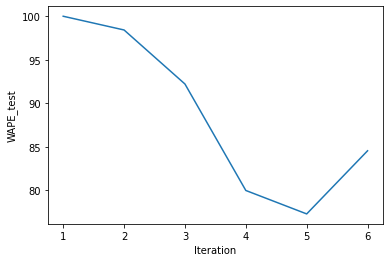

In [ ]:
plt.plot(iterations, scores_test)
plt.xlabel('Iteration')
plt.ylabel('WAPE_test')